# Procesamiento de datos

Importa librerías necesarias para análisis de datos y manejo de archivos.

In [1]:
import pandas as pd
import numpy as np
import glob

Buscar todos los archivos CSV en la carpeta "datasets" y carga todos los CSV en una lista de DataFrames, ignorando líneas problemáticas

In [ ]:
archivos = glob.glob("datasets/*.csv")

print("Archivos encontrados:")
for f in archivos:
    print(f)

dataframes = []
for f in archivos:
    try:
        df = pd.read_csv(f, on_bad_lines='skip')
        dataframes.append(df)
    except Exception as e:
        print(f"Error al leer {f}: {e}")


Archivos encontrados:
datasets\API_EN.GHG.FGAS.IP.MT.CE.AR5_DS2_es_csv_v2_75297.csv
datasets\API_ER.H2O.FWTL.ZS_DS2_es_csv_v2_49721.csv
datasets\API_FB.BNK.CAPA.ZS_DS2_es_csv_v2_35034.csv
datasets\API_SH.STA.SMSS.ZS_DS2_es_csv_v2_55700.csv
datasets\OWID_CB.csv
datasets\points_data.csv
datasets\WDPA_WDOECM_Aug2025_Public_HND_csv.csv


Limpieza básica de un DataFrame:
    1. Eliminar duplicados
    2. Rellenar valores nulos (texto → 'desconocido', numéricos → mediana)
    3. Convertir columnas con 'fecha' a tipo datetime

In [ ]:
def limpieza_basica(df):
    df = df.drop_duplicates()

    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].fillna("desconocido").str.strip().str.lower()
        else: 
            df[col] = df[col].fillna(df[col].median())

    for col in df.columns:
        if "fecha" in col.lower():
            df[col] = pd.to_datetime(df[col], errors="coerce")
    
    return df


 Aplicar limpieza a cada DataFrame cargado y mostrar comparativa de filas

In [4]:
dataframes_limpios = []

for archivo, df in zip(archivos, dataframes):
    df_limpio = limpieza_basica(df)
    dataframes_limpios.append(df_limpio)
    print(f"{archivo} -> Filas originales: {df.shape[0]}, Filas limpias: {df_limpio.shape[0]}")


datasets\API_EN.GHG.FGAS.IP.MT.CE.AR5_DS2_es_csv_v2_75297.csv -> Filas originales: 266, Filas limpias: 266
datasets\API_ER.H2O.FWTL.ZS_DS2_es_csv_v2_49721.csv -> Filas originales: 266, Filas limpias: 266
datasets\API_FB.BNK.CAPA.ZS_DS2_es_csv_v2_35034.csv -> Filas originales: 266, Filas limpias: 266
datasets\API_SH.STA.SMSS.ZS_DS2_es_csv_v2_55700.csv -> Filas originales: 266, Filas limpias: 266
datasets\OWID_CB.csv -> Filas originales: 3079976, Filas limpias: 3079976
datasets\points_data.csv -> Filas originales: 1375, Filas limpias: 1375
datasets\WDPA_WDOECM_Aug2025_Public_HND_csv.csv -> Filas originales: 119, Filas limpias: 119


Crear carpeta "data_limpios" y guardar allí los DataFrames limpios

In [ ]:
import os
os.makedirs("data_limpios", exist_ok=True)


for archivo, df in zip(archivos, dataframes_limpios):
    nombre = os.path.basename(archivo)  # nombre del archivo original
    df.to_csv(os.path.join("data_limpios", f"limpio_{nombre}"), index=False)

print("Archivos limpios guardados en carpeta 'data_limpios'")


✅ Archivos limpios guardados en carpeta 'data_limpios'


# Aplicacion de Tecnicas de analisis de datos

Importar librerías de visualización y configurar estilo gráfico.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Seleccionar algunos archivos limpios específicos para análisis

In [54]:
archivos = [
    "data_limpios/limpio_API_ER.H2O.FWTL.ZS_DS2_es_csv_v2_49721.csv",
    "data_limpios/limpio_API_FB.BNK.CAPA.ZS_DS2_es_csv_v2_35034.csv",
    "data_limpios/limpio_API_EN.GHG.FGAS.IP.MT.CE.AR5_DS2_es_csv_v2_75297.csv",
    "data_limpios/limpio_API_SH.STA.SMSS.ZS_DS2_es_csv_v2_55700.csv"
]

dataframes = [pd.read_csv(f) for f in archivos]


Transformar DataFrame de formato ancho a largo:
    - Mantener columnas de identificación (país, indicador)
    - Convertir años en columna "Year"
    - Valores en columna "Value"

In [8]:
def transformar(df):
    df_long = df.melt(
        id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
        var_name="Year",
        value_name="Value"
    )
    df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")
    return df_long

dataframes_long = [transformar(df) for df in dataframes]



Gráfico de tendencia global extracción de agua dulce

c:\Users\gerar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


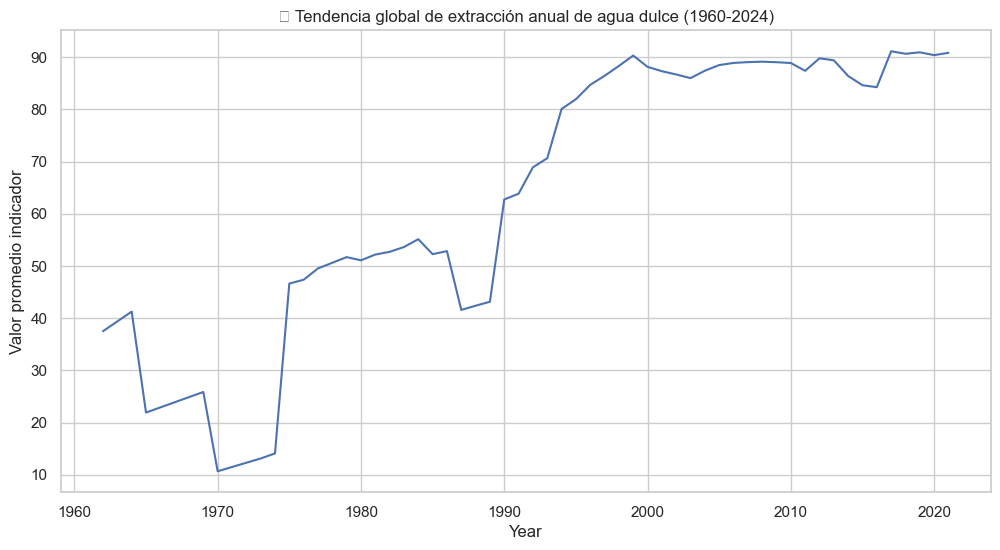

In [ ]:
df_def = dataframes_long[0] 

trend = df_def.groupby("Year")["Value"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=trend, x="Year", y="Value")
plt.title("Tendencia global de extracción anual de agua dulce (1960-2024)")
plt.ylabel("Valor promedio indicador")
plt.show()



Gráfico de tendencia global capital bancario vs activos

c:\Users\gerar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


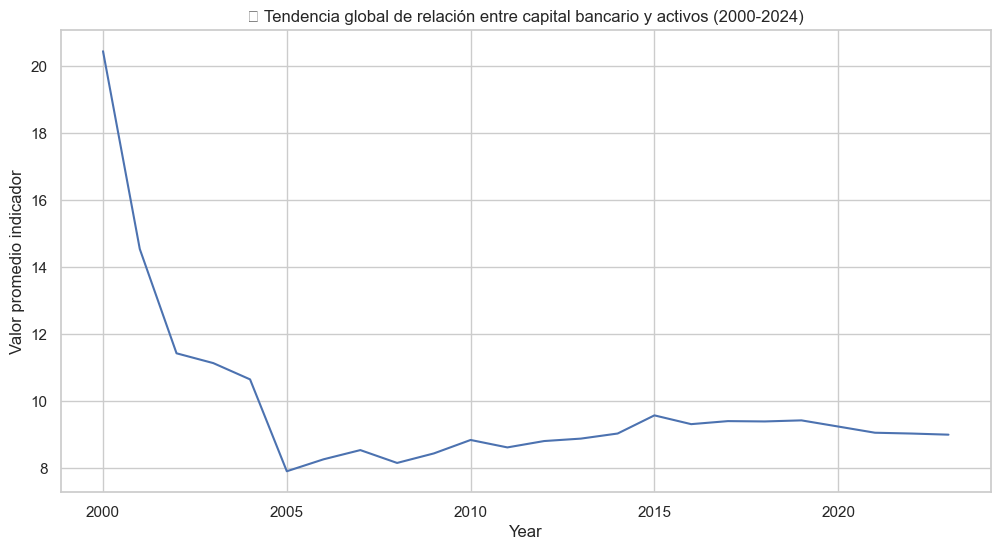

In [ ]:
df_def = dataframes_long[1] 

trend = df_def.groupby("Year")["Value"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=trend, x="Year", y="Value")
plt.title("Tendencia global de relación entre capital bancario y activos (2000-2024)")
plt.ylabel("Valor promedio indicador")
plt.show()

Gráfico de tendencia global emisiones gases industriales

c:\Users\gerar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


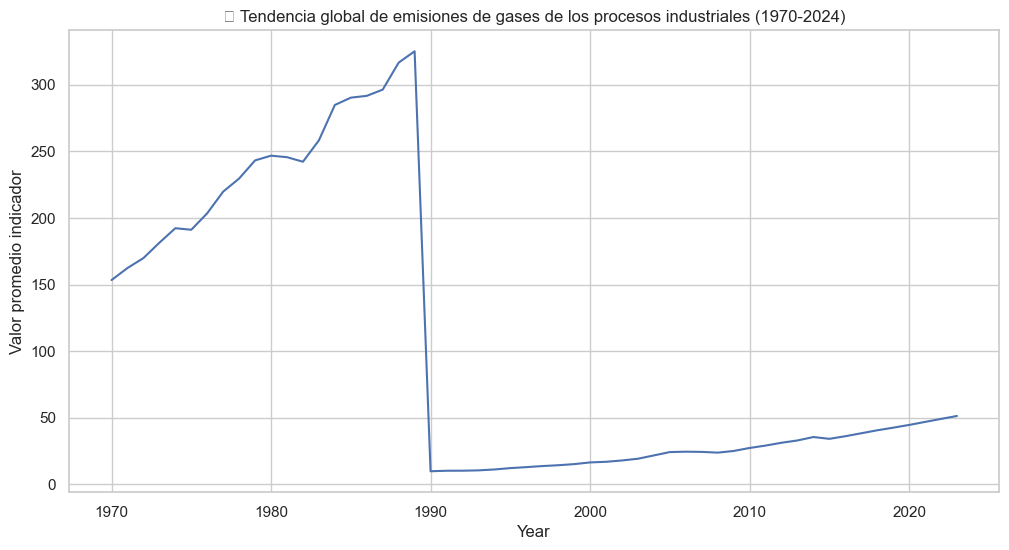

In [17]:
df_def = dataframes_long[2] 

trend = df_def.groupby("Year")["Value"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=trend, x="Year", y="Value")
plt.title("🌍 Tendencia global de emisiones de gases de los procesos industriales (1970-2024)")
plt.ylabel("Valor promedio indicador")
plt.show()

Gráfico de tendencia global uso correcto de servicios sanitarios

c:\Users\gerar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


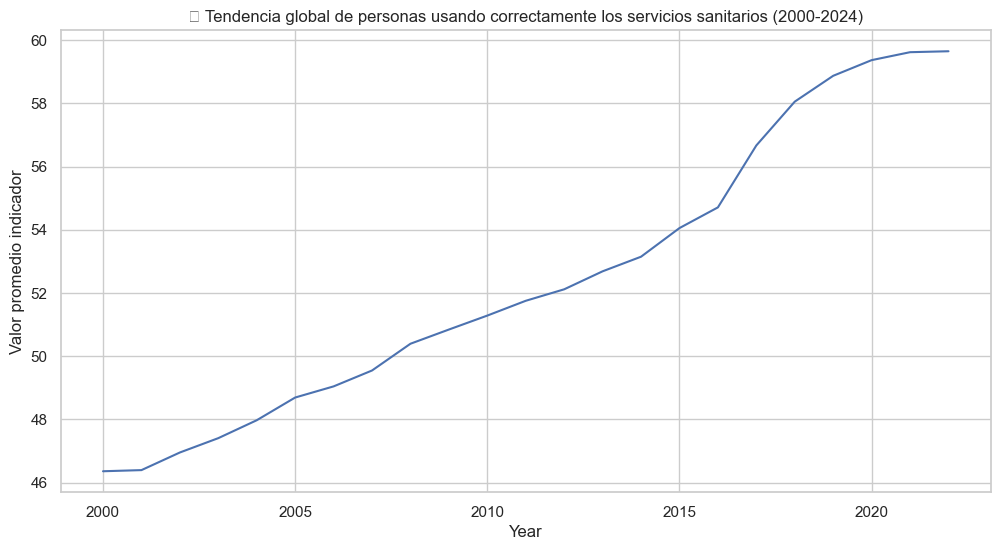

In [18]:
df_def = dataframes_long[3] 

trend = df_def.groupby("Year")["Value"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=trend, x="Year", y="Value")
plt.title("🌍 Tendencia global de personas usando correctamente los servicios sanitarios (2000-2024)")
plt.ylabel("Valor promedio indicador")
plt.show()

# Modelo Predictivos

# CSV DE extracción anual de agua dulce

Ejemplo de modelo predictivo para un país específico (Brasil)

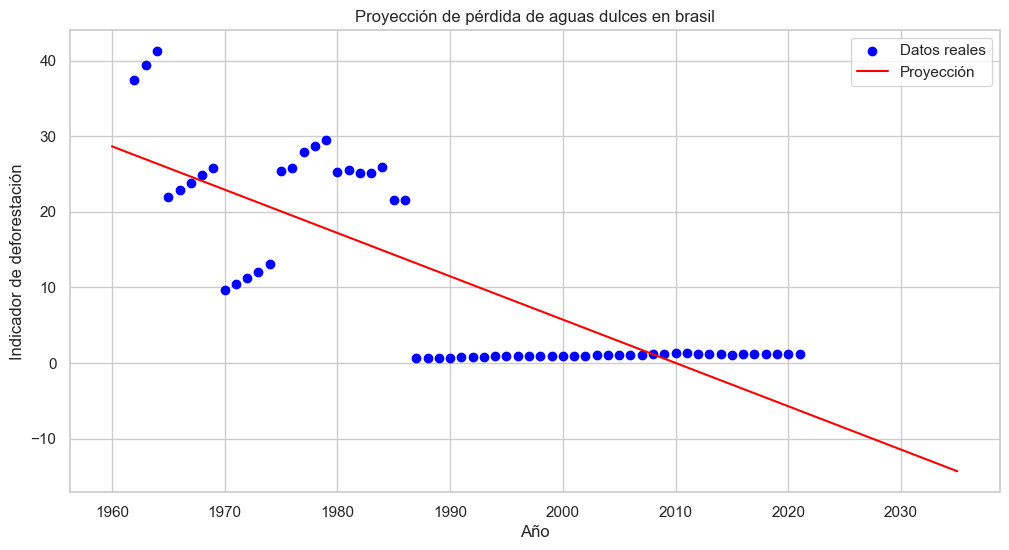

In [ ]:
from sklearn.linear_model import LinearRegression

df_def = dataframes_long[0]  

pais = "brasil"
df_pais = df_def[df_def["Country Name"] == pais].dropna(subset=["Value"])

if df_pais.empty:
	print(f"No hay datos disponibles para el país: {pais}")
else:
	X = df_pais["Year"].values.reshape(-1,1)
	y = df_pais["Value"].values

	# Entrenar modelo
	model = LinearRegression()
	model.fit(X, y)

	# Proyectar hasta 2035
	future_years = np.arange(1960, 2036).reshape(-1,1)
	y_pred = model.predict(future_years)

	# Visualización
	plt.figure(figsize=(12,6))
	plt.scatter(X, y, label="Datos reales", color="blue")
	plt.plot(future_years, y_pred, color="red", label="Proyección")
	plt.title(f"Proyección de extraccion de aguas dulces en {pais}")
	plt.xlabel("Año")
	plt.ylabel("Indicador de deforestación")
	plt.legend()
	plt.show()


Configuración global para proyecciones

In [ ]:
anio_horizonte = 2035
indicador_es_perdida = True 
min_puntos_por_pais = 5 

 Ajusta un modelo lineal para un país y devuelve métricas clave:
    - Último valor observado
    - Predicción para 2030 y 2035
    - Pendiente (tendencia)
    - Cambio proyectado al 2035

In [ ]:
def proyectar_pais(df_pais, anio_hasta=2035):
   
    df_pais = df_pais.dropna(subset=["Value"]).sort_values("Year")
    if df_pais.shape[0] < 2:
        return None
    
    X = df_pais["Year"].values.reshape(-1, 1)
    y = df_pais["Value"].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    
    anio_ultimo = int(df_pais["Year"].max())
    val_ultimo = float(df_pais.loc[df_pais["Year"] == anio_ultimo, "Value"].iloc[0])
    
    
    def pred(anio): 
        return float(model.predict(np.array([[anio]]) )[0])
    
    y2030 = pred(2030) if 2030 >= df_pais["Year"].min() else np.nan
    y2035 = pred(anio_hasta)
    
    pendiente = float(model.coef_[0])
    delta_2035 = y2035 - val_ultimo 
    
    return {
        "anio_min": int(df_pais["Year"].min()),
        "anio_max": anio_ultimo,
        "valor_ultimo": val_ultimo,
        "y2030": y2030,
        "y2035": y2035,
        "pendiente_por_anio": pendiente,
        "delta_2035_vs_ultimo": delta_2035
    }


 Aplicar proyecciones a todos los países y construir DataFrame con resultados

In [57]:
resultados = []

for pais, g in df_def.groupby("Country Name"):
    g = g.dropna(subset=["Value"])
    if g.shape[0] < min_puntos_por_pais:
        continue
    
    met = proyectar_pais(g, anio_hasta=anio_horizonte)
    if met is None:
        continue
    
    resultados.append({
        "Country Name": pais,
        "Country Code": g["Country Code"].iloc[0],
        "Indicator Name": g["Indicator Name"].iloc[0],
        "anio_min": met["anio_min"],
        "anio_max": met["anio_max"],
        "valor_ultimo": met["valor_ultimo"],
        "y2030": met["y2030"],
        "y2035": met["y2035"],
        "pendiente_por_anio": met["pendiente_por_anio"],
        "delta_2035_vs_ultimo": met["delta_2035_vs_ultimo"]
    })

proyecciones = pd.DataFrame(resultados)
print("Países modelados:", proyecciones.shape[0])
proyecciones.head()


Países modelados: 265


,Country Name,Country Code,Indicator Name,anio_min,anio_max,valor_ultimo,y2030,y2035,pendiente_por_anio,delta_2035_vs_ultimo
0,afganistán,afg,"extracción anual de agua dulce, total (% de re...",1962,2021,43.015907,53.260920,55.143356,0.376487,12.127450
1,albania,alb,"extracción anual de agua dulce, total (% de re...",1962,2021,2.959108,-6.300563,-8.787429,-0.497373,-11.746537
2,alemania,deu,"extracción anual de agua dulce, total (% de re...",1962,2021,24.105205,35.461711,36.305122,0.168682,12.199917
3,américa del norte,nac,"extracción anual de agua dulce, total (% de re...",1962,2021,8.480048,0.018436,-1.930017,-0.389691,-10.410065
4,américa latina y el caribe,lcn,"extracción anual de agua dulce, total (% de re...",1962,2021,2.685644,-3.363513,-5.649876,-0.457273,-8.335520


Ranking de países con peor proyección hacia 2035

In [59]:
if indicador_es_perdida:
    ranking_peor = proyecciones.sort_values("delta_2035_vs_ultimo", ascending=False)
else:
    ranking_peor = proyecciones.sort_values("delta_2035_vs_ultimo", ascending=True)

ranking_top15_peor = ranking_peor.head(15)
ranking_top15_peor[["Country Name", "valor_ultimo", "y2035", "delta_2035_vs_ultimo", "pendiente_por_anio"]]


,Country Name,valor_ultimo,y2035,delta_2035_vs_ultimo,pendiente_por_anio
25,bahrein,3877.500000,8009.831393,4132.331393,119.219854
67,"egipto, república árabe de",7750.000000,10548.989878,2798.989878,133.026599
246,turkmenistán,1867.971530,2974.277607,1106.306077,47.741219
70,emiratos árabes unidos,1533.333333,2615.903895,1082.570562,37.882022
10,arabia saudita,974.166667,1412.421747,438.255081,22.266650
143,libia,817.142857,1197.638427,380.495570,16.563917
226,singapur,83.116667,302.881240,219.764573,3.460401
158,mauritania,337.050000,555.188421,218.138421,6.856821
254,uzbekistán,260.000000,473.924578,213.924578,7.241198
202,qatar,446.428571,611.820757,165.392186,7.272128


Ranking de países con mejor proyección hacia 2035

In [60]:
if indicador_es_perdida:
    ranking_mejor = proyecciones.sort_values("delta_2035_vs_ultimo", ascending=True)
else:
    ranking_mejor = proyecciones.sort_values("delta_2035_vs_ultimo", ascending=False)

ranking_top15_mejor = ranking_mejor.head(15)
ranking_top15_mejor[["Country Name", "valor_ultimo", "y2035", "delta_2035_vs_ultimo", "pendiente_por_anio"]]


,Country Name,valor_ultimo,y2035,delta_2035_vs_ultimo,pendiente_por_anio
231,sudán,673.375000,510.689900,-162.685100,8.847272
68,el mundo árabe,203.775399,118.342805,-85.432595,1.797754
182,"oriente medio, norte de áfrica, afganistán y p...",173.531177,89.891917,-83.639260,1.280087
180,oriente medio y norte de áfrica (birf y la aif),167.455863,85.922254,-81.533609,1.207944
181,oriente medio y norte de áfrica (excluido alto...,167.143208,85.751076,-81.392131,1.204832
43,cabo verde,57.177507,30.825641,-26.351866,0.196142
178,níger,73.808794,51.726938,-22.081856,0.517412
16,asia meridional (birf y la aif),37.560874,16.576580,-20.984294,-0.053427
15,asia meridional,37.560874,16.576580,-20.984294,-0.053427
215,saint kitts y nevis,50.833333,30.709526,-20.123808,0.198457


Visualización ranking top 15 países más afectados

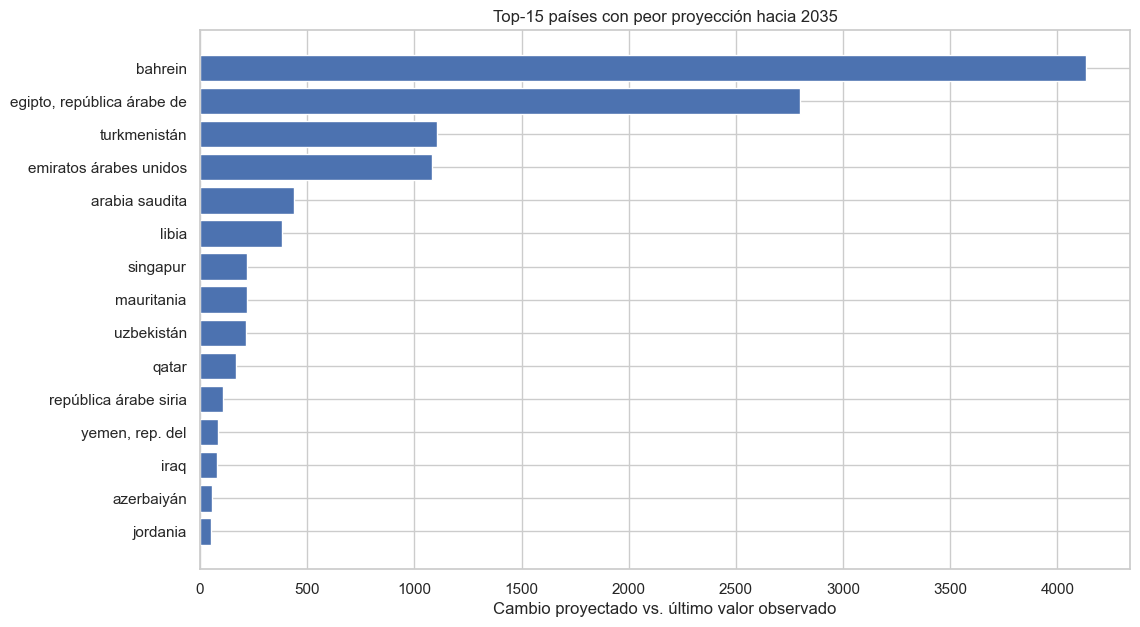

In [61]:
plt.figure(figsize=(12, 7))
plot_df = ranking_top15_peor.copy()
plt.barh(plot_df["Country Name"], plot_df["delta_2035_vs_ultimo"])
plt.gca().invert_yaxis()
titulo = "Top-15 países con peor proyección hacia 2035"
plt.title(f"{titulo}")
plt.xlabel("Cambio proyectado vs. último valor observado")
plt.ylabel("")
plt.show()


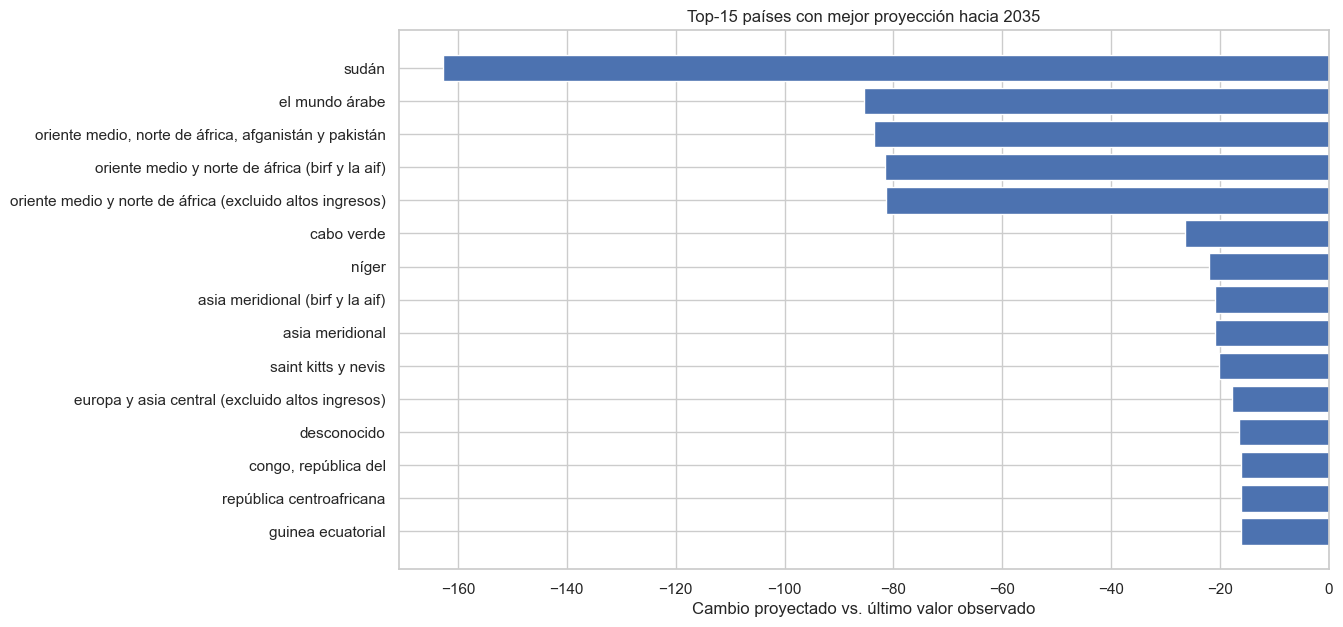

In [62]:
plt.figure(figsize=(12, 7))
plot_df = ranking_top15_mejor.copy()
plt.barh(plot_df["Country Name"], plot_df["delta_2035_vs_ultimo"])
plt.gca().invert_yaxis()
titulo = "Top-15 países con mejor proyección hacia 2035"
plt.title(f"{titulo}")
plt.xlabel("Cambio proyectado vs. último valor observado")
plt.ylabel("")
plt.show()


Gráfico detallado de series históricas y proyecciones para los 5 peores países

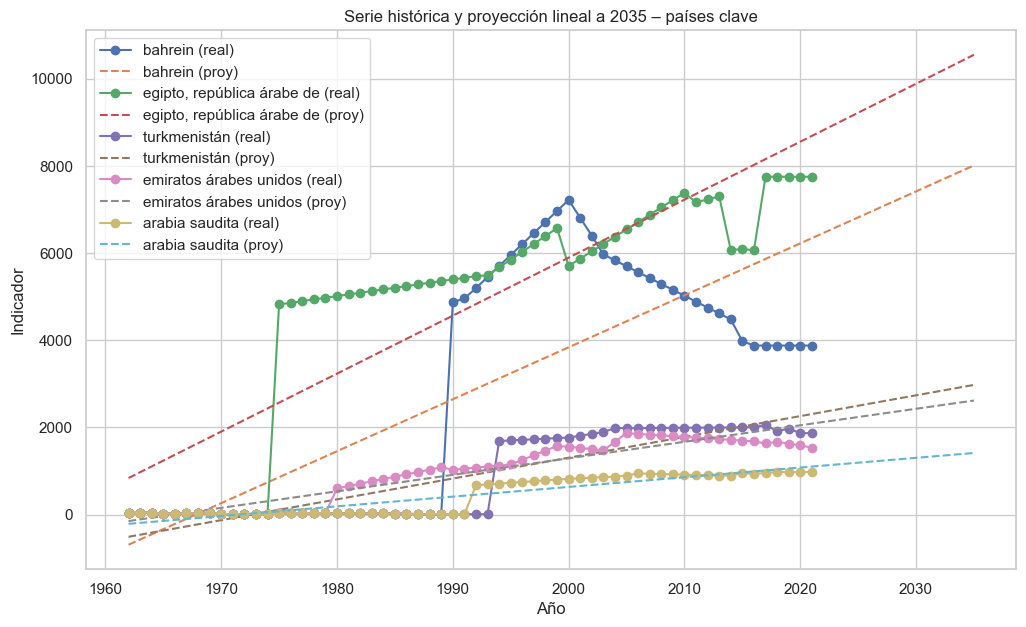

In [63]:
paises_clave = ranking_top15_peor["Country Name"].head(5).tolist() 
plt.figure(figsize=(12, 7))

for pais in paises_clave:
    g = df_def[df_def["Country Name"] == pais].dropna(subset=["Value"]).sort_values("Year")
    if g.empty: 
        continue
    
    
    plt.plot(g["Year"], g["Value"], marker="o", label=f"{pais} (real)")
    

    X = g["Year"].values.reshape(-1,1)
    y = g["Value"].values
    model = LinearRegression().fit(X, y)
    
    years_proj = np.arange(g["Year"].min(), anio_horizonte+1)
    yhat = model.predict(years_proj.reshape(-1,1))
    plt.plot(years_proj, yhat, linestyle="--", label=f"{pais} (proy)")
    
plt.title("Serie histórica y proyección lineal a 2035 – países clave")
plt.xlabel("Año")
plt.ylabel("Indicador")
plt.legend()
plt.show()


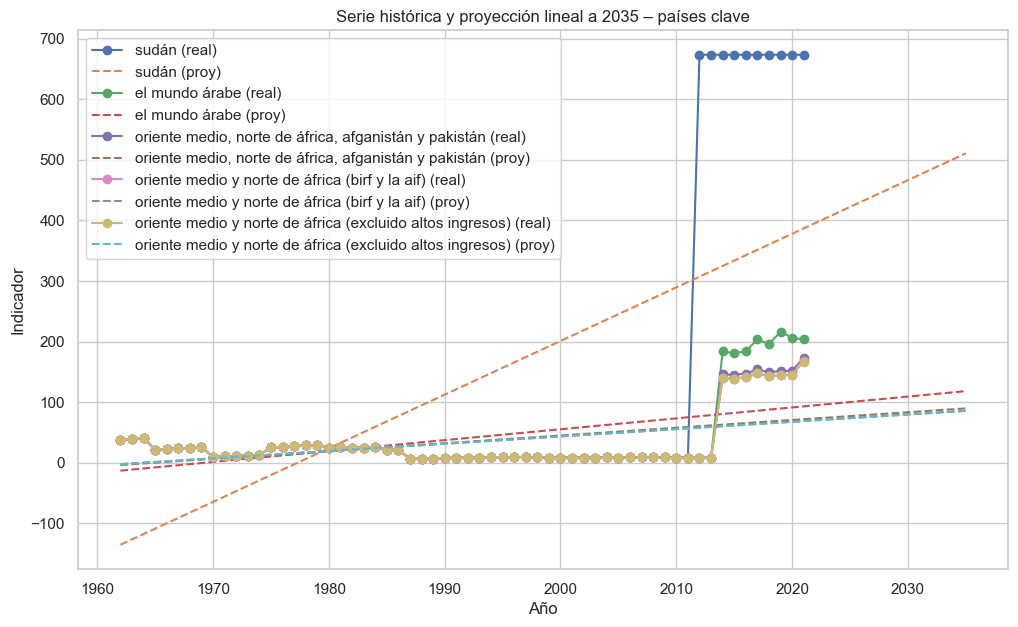

In [64]:
paises_clave = ranking_top15_mejor["Country Name"].head(5).tolist() 
plt.figure(figsize=(12, 7))

for pais in paises_clave:
    g = df_def[df_def["Country Name"] == pais].dropna(subset=["Value"]).sort_values("Year")
    if g.empty: 
        continue
    
    
    plt.plot(g["Year"], g["Value"], marker="o", label=f"{pais} (real)")
    

    X = g["Year"].values.reshape(-1,1)
    y = g["Value"].values
    model = LinearRegression().fit(X, y)
    
    years_proj = np.arange(g["Year"].min(), anio_horizonte+1)
    yhat = model.predict(years_proj.reshape(-1,1))
    plt.plot(years_proj, yhat, linestyle="--", label=f"{pais} (proy)")
    
plt.title("Serie histórica y proyección lineal a 2035 – países clave")
plt.xlabel("Año")
plt.ylabel("Indicador")
plt.legend()
plt.show()


In [58]:
import os
os.makedirs("salidas_modelado", exist_ok=True)
proyecciones.to_csv("salidas_modelado/proyecciones_lineales_2035)agua_dulce.csv", index=False)